# Import Statements

In [175]:
from dask import dataframe as dd
import time
import numpy as np
import pandas as pd
from pandas import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
sns.set_style("whitegrid")
import matplotlib.image as mpimg

# Need to check Dask( temporary on hold)

In [176]:
"""start = time.time()
Census = dd.read_csv('Census.csv')
end = time.time()
print("Read csv with dask: ",(end-start),"sec")
Census.head()"""

'start = time.time()\nCensus = dd.read_csv(\'Census.csv\')\nend = time.time()\nprint("Read csv with dask: ",(end-start),"sec")\nCensus.head()'

In [177]:
"""start = time.time()
Crimes= dd.read_csv('Crimes.csv')
end = time.time()
print("Read csv with dask: ",(end-start),"sec")
Crimes.head()"""

'start = time.time()\nCrimes= dd.read_csv(\'Crimes.csv\')\nend = time.time()\nprint("Read csv with dask: ",(end-start),"sec")\nCrimes.head()'

# Preliminary Data Processing

### 1.Understanding the shape of data 

In [178]:
start = time.time()
Crimes=pd.read_csv('Crimes.csv', engine = 'c')
end = time.time()
print("Read csv with pandas: ",(end-start),"sec")
Crimes.shape


Read csv with pandas:  31.560213804244995 sec


(7299208, 22)

In [179]:
start = time.time()
Census=pd.read_csv('Census.csv', engine = 'c')
end = time.time()
print("Read csv with pandas: ",(end-start),"sec")
Census.shape


Read csv with pandas:  0.026286840438842773 sec


(78, 9)

### 2. Understanding various data types

In [180]:
Crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299208 entries, 0 to 7299207
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [181]:
Census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Community Area Number                         77 non-null     float64
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER CAPITA INCOME                             78 non-null     int64  
 8   HARDSHIP INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [182]:
Census.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [183]:
Crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


# Data Quality Issues

### 1.Create a copy of orginal data

In [184]:
Crimes_copy=Crimes.copy()

In [185]:
Census_copy=Census.copy()

### 2. Removing Duplicate columns of Longitude and Latitude as separate Location column is present

In [186]:
Crimes_copy.drop(['Latitude','Longitude'],axis=1,inplace=True)
Crimes_copy.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,"(41.881903443, -87.755121152)"


### 3.Replacing spaces in the column headers for easy of access

In [197]:
Crimes_copy.columns = Crimes_copy.columns.str.replace(' ', '')
CrimeCols=Crimes_copy.columns
Crimes_copy.head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,"(41.895080471, -87.765400451)"
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,"(41.744378879, -87.658430635)"


### 4.Checking for missing values in the data 

0          False
1          False
2           True
3          False
4          False
           ...  
7299203    False
7299204    False
7299205    False
7299206    False
7299207    False
Length: 7299208, dtype: bool

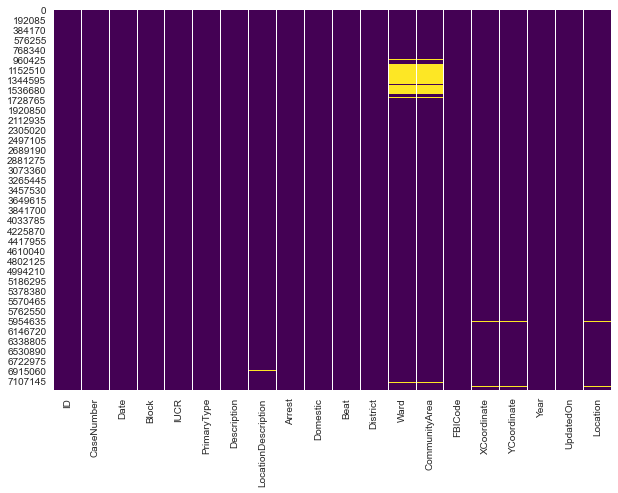

In [188]:
plt.figure(figsize=(10,7))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(Crimes_copy.isnull(), cbar = False,cmap="viridis")
pd.isnull(Crimes_copy).any(axis=1)

<AxesSubplot:>

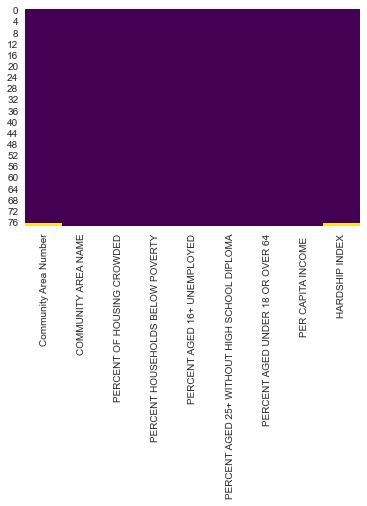

In [198]:
sns.heatmap(Census_copy.isnull(), cbar = False,cmap="viridis")

### 5. Removing missing values from the dataset

0          False
1          False
3          False
4          False
5          False
           ...  
7299203    False
7299204    False
7299205    False
7299206    False
7299207    False
Length: 6615222, dtype: bool

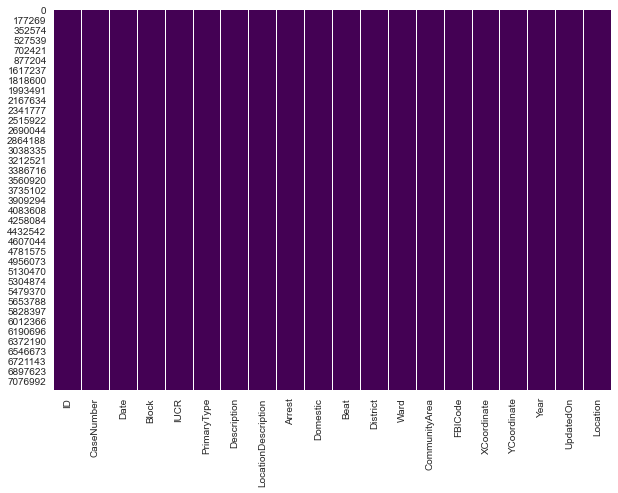

In [196]:
Crimes_copy=Crimes_copy.dropna()
plt.figure(figsize=(10,7))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(Crimes_copy.isnull(), cbar = False,cmap="viridis")
pd.isnull(Crimes_copy).any(axis=1)

<AxesSubplot:>

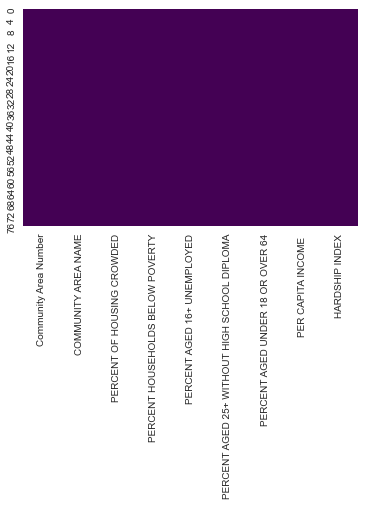

In [199]:
Census_copy=Census_copy.dropna()
sns.heatmap(Census_copy.isnull(), cbar = False,cmap="viridis")

### 6.Conversion of Date Time to python's DateTime format

In [190]:
Crimes.Date=pd.to_datetime(Crimes.Date,format='%m/%d/%Y %I:%M:%S %p')
Crimes.index = pd.DatetimeIndex(Crimes.Date)

# Exploratory Data Analysis and their Visualisations

###  1. Which locations do the crimes mostly occur ?

<AxesSubplot:xlabel='count', ylabel='Location Description'>

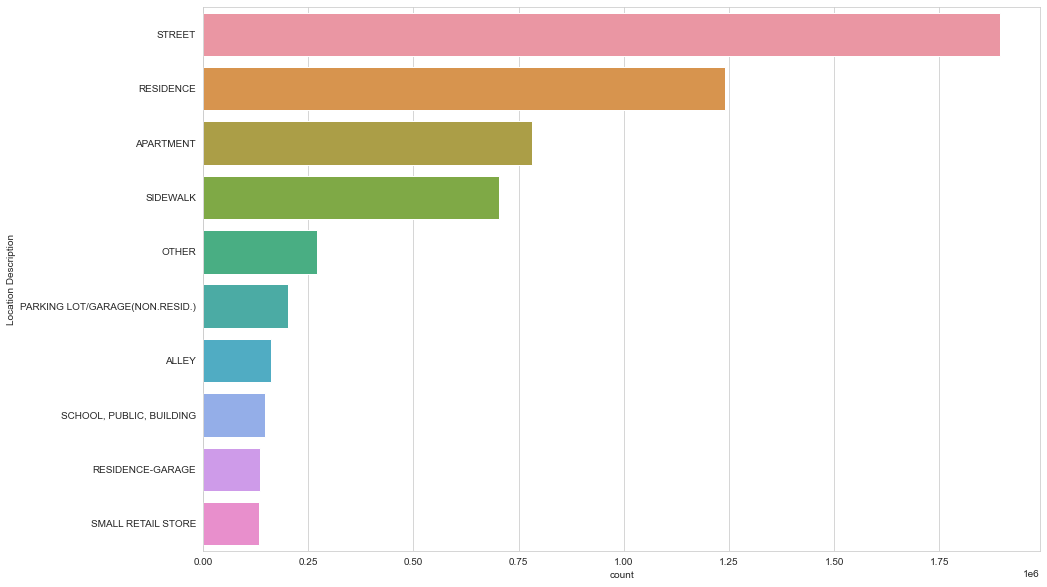

In [191]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = Crimes, order = Crimes['Location Description'].value_counts().iloc[:10].index)

### 3. Which crimes happen the most ?

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

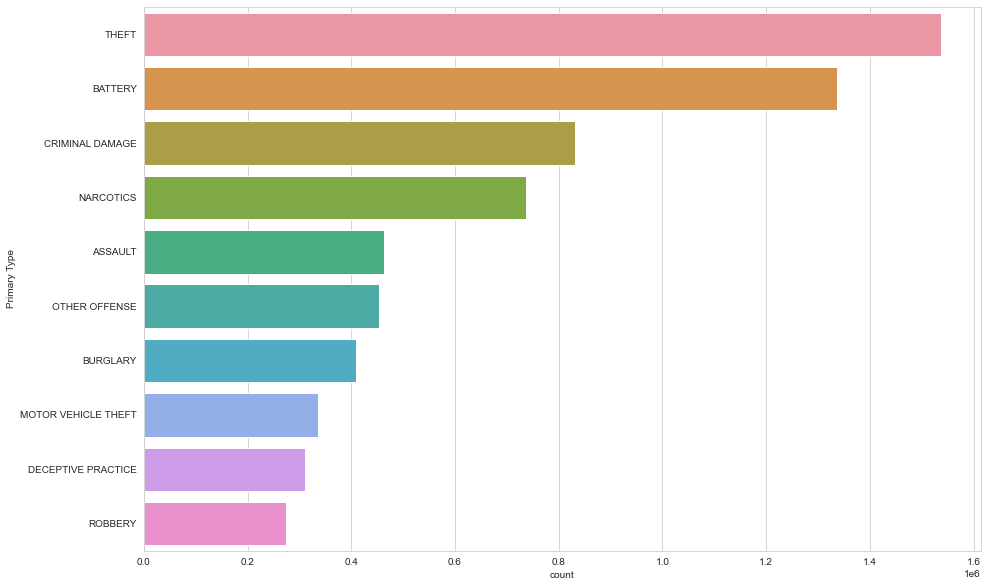

In [211]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = Crimes, order = Crimes['Primary Type'].value_counts().iloc[:10].index)

### 4. What is the trend of the crimes happening along the years?

In [206]:
datagb_location=Crimes_copy.groupby("LocationDescription")["LocationDescription"].count()
datagb_location.sort_values(ascending=False, inplace=True)
datagb_location.head(50)

LocationDescription
STREET                               1694416
RESIDENCE                            1103239
APARTMENT                             738883
SIDEWALK                              662167
OTHER                                 239245
PARKING LOT/GARAGE(NON.RESID.)        181782
ALLEY                                 147919
SCHOOL, PUBLIC, BUILDING              131395
SMALL RETAIL STORE                    123024
RESIDENCE-GARAGE                      122158
RESIDENCE PORCH/HALLWAY               112302
VEHICLE NON-COMMERCIAL                110625
RESTAURANT                            108058
DEPARTMENT STORE                       83397
GROCERY FOOD STORE                     82888
RESIDENTIAL YARD (FRONT/BACK)          74821
GAS STATION                            74101
PARK PROPERTY                          50256
COMMERCIAL / BUSINESS OFFICE           45778
CHA PARKING LOT/GROUNDS                44926
BAR OR TAVERN                          36655
CTA PLATFORM                       

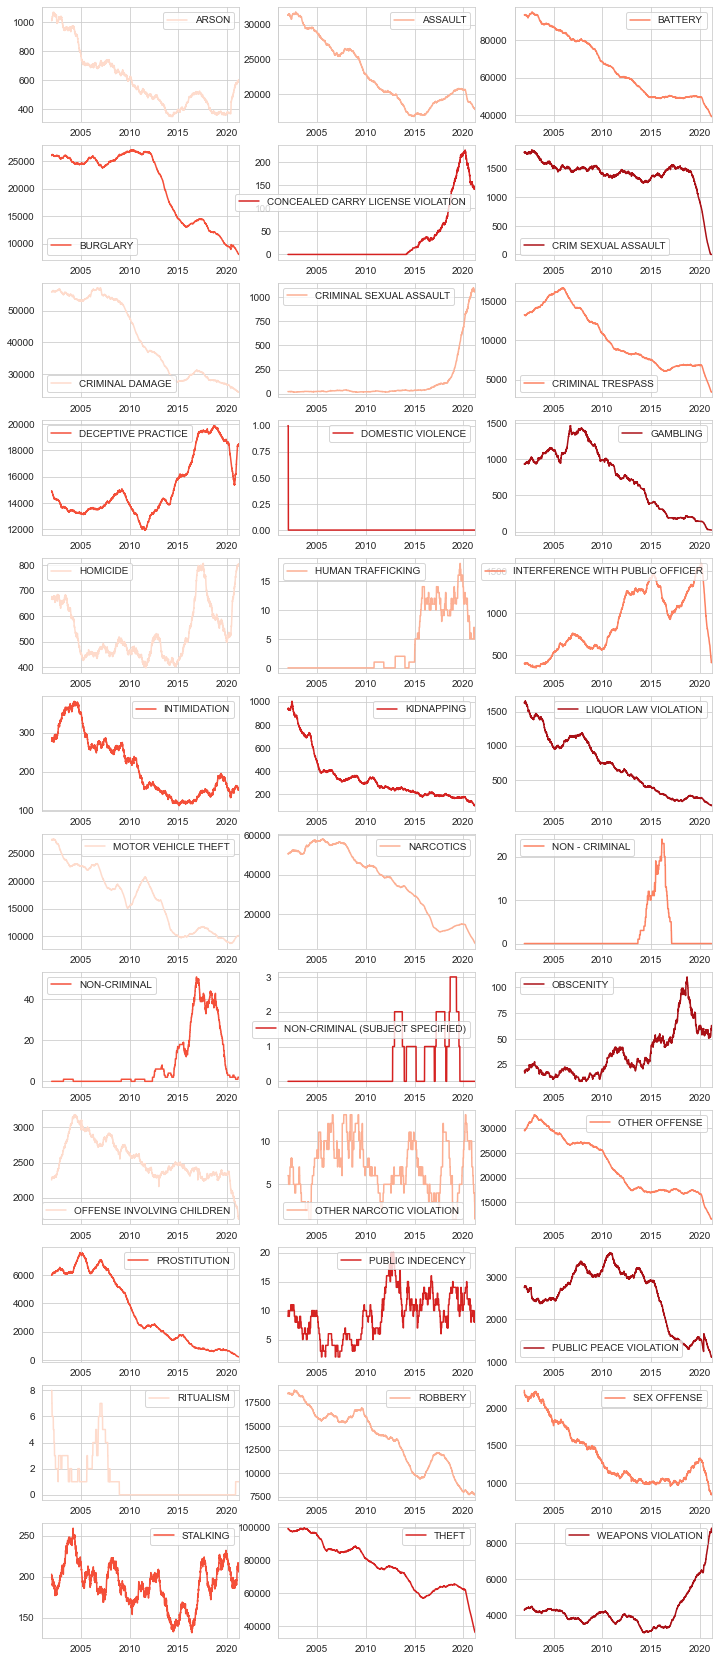

In [193]:
crime_data_count_date = Crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=Crimes.index.date, fill_value=0)
crime_data_count_date.index = pd.DatetimeIndex(crime_data_count_date.index)
plo = crime_data_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)